In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-07-03 12:19:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.15MB/s    in 46s     

2021-07-03 12:19:52 (6.63 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os

list_file = []
list_label = []
list_path = []

for path, subdirs, files in os.walk('/tmp/rockpaperscissors/rps-cv-images/'):
  for file in files:
    list_file.append(file)
    list_label.append(path.split('/')[-1])
    list_path.append(os.path.join(path, file))

In [ ]:
import pandas as pd

dataframe = pd.DataFrame({'file' : list_file[1:], 
                          'label' : list_label[1:], 
                          'path' : list_path[1:]})
dataframe

,file,label,path
0,9Ke26ZpKvhVSXl4V.png,rock,/tmp/rockpaperscissors/rps-cv-images/rock/9Ke2...
1,qYTvWILCYIauIMkW.png,rock,/tmp/rockpaperscissors/rps-cv-images/rock/qYTv...
2,D7Ykcj1tYAannu8h.png,rock,/tmp/rockpaperscissors/rps-cv-images/rock/D7Yk...
3,S9iRciyZ0OktMu7s.png,rock,/tmp/rockpaperscissors/rps-cv-images/rock/S9iR...
4,y7JyZqsFZUwdvkY2.png,rock,/tmp/rockpaperscissors/rps-cv-images/rock/y7Jy...
...,...,...,...
2183,5jcXrtjEVtQwI0Wa.png,paper,/tmp/rockpaperscissors/rps-cv-images/paper/5jc...
2184,fYuJzeeHPzGwlGh0.png,paper,/tmp/rockpaperscissors/rps-cv-images/paper/fYu...
2185,DGR6Jkl5GJY9Sez0.png,paper,/tmp/rockpaperscissors/rps-cv-images/paper/DGR...
2186,JQaNQ7LsPy3cY23Q.png,paper,/tmp/rockpaperscissors/rps-cv-images/paper/JQa...


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(dataframe['path'], dataframe['label'], test_size=0.39945155393053017, random_state=100)
dataframe_train = pd.DataFrame({'x' : x_train, 'y' : y_train})
dataframe_val = pd.DataFrame({'x' : x_val, 'y' : y_val})

print('Banyak Data Latih    : ', len(dataframe_train))
print('Banyak Data Validasi : ', len(dataframe_val))

# Kalau test_size=0.4 nanti jumlah data latih 1312 dan data validasi 876

Banyak Data Latih    :  1314
Banyak Data Validasi :  874


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    vertical_flip=True,
                                    shear_range = 0.2,
                                    fill_mode = 'nearest')

data_train_generator = data_generator.flow_from_dataframe(dataframe=dataframe_train, 
                                                          directory='/tmp/rockpaperscissors/rps-cv-images',
                                                          x_col='x', y_col='y')
data_val_generator = data_generator.flow_from_dataframe(dataframe=dataframe_val, 
                                                          directory='/tmp/rockpaperscissors/rps-cv-images',
                                                          x_col='x', y_col='y')

Found 1314 validated image filenames belonging to 3 classes.
Found 874 validated image filenames belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

history = model.fit(data_train_generator, epochs=20, validation_data=data_val_generator)

Epoch 1/20
42/42 [==============================] - 33s 702ms/step - loss: 1.0344 - accuracy: 0.4528 - val_loss: 0.8983 - val_accuracy: 0.6922
Epoch 2/20
42/42 [==============================] - 28s 682ms/step - loss: 0.6734 - accuracy: 0.7633 - val_loss: 0.5208 - val_accuracy: 0.8181
Epoch 3/20
42/42 [==============================] - 29s 686ms/step - loss: 0.4844 - accuracy: 0.8295 - val_loss: 0.4132 - val_accuracy: 0.8478
Epoch 4/20
42/42 [==============================] - 28s 679ms/step - loss: 0.4315 - accuracy: 0.8546 - val_loss: 0.3416 - val_accuracy: 0.8913
Epoch 5/20
42/42 [==============================] - 28s 683ms/step - loss: 0.3363 - accuracy: 0.8896 - val_loss: 0.3314 - val_accuracy: 0.8844
Epoch 6/20
42/42 [==============================] - 28s 681ms/step - loss: 0.2731 - accuracy: 0.9117 - val_loss: 0.3191 - val_accuracy: 0.8913
Epoch 7/20
42/42 [==============================] - 28s 681ms/step - loss: 0.2526 - accuracy: 0.9209 - val_loss: 0.2511 - val_accuracy: 0.9153

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 128)       0

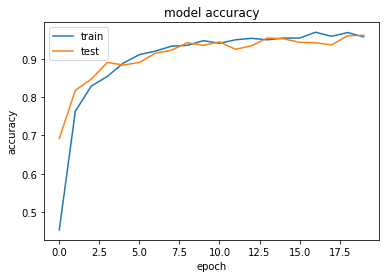

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 6gt1kvpjTKJIA7S0.png to 6gt1kvpjTKJIA7S0 (2).png
Gambar yang Anda masukkan termasuk dalam kategori :  scissors


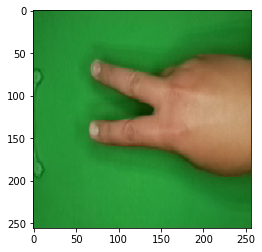

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  gambar = image.load_img(path, target_size=(256,256))
  imgplot = plt.imshow(gambar)

  y = np.array(['rock', 'paper', 'scissors'])
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)
  x = np.vstack([x])

  prediksi = model.predict(x)

  print("Gambar yang Anda masukkan termasuk dalam kategori : ", y[np.argmax(prediksi)])